# Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Data Pre-Processing

Read the dataset and drop *Unnamed: 0* column.

In [2]:
pd.set_option("display.max.columns",None)

df = pd.read_csv("nyc-rolling-sales.csv")
df = df.drop(["Unnamed: 0"],axis=1)
df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,10009,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,,10009,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,,10009,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,10009,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,10009,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


Lower the columns' names and replace the blank spaces with underscores.

In [3]:
df.columns = (df.columns.str.lower()).str.replace(" ","_")

Get all the numerical columns and change them to numeric.

In [4]:
num_columns = ["residential_units","commercial_units","total_units",
               "land_square_feet","gross_square_feet","year_built","sale_price"]

for i in num_columns:
    df[i] = pd.to_numeric(df[i],errors="coerce")

Get all the categorical columns and change them to object.

In [5]:
cat_columns = []
for i in df.columns[:-1]:
    if i not in num_columns:
        cat_columns.append(i)
        
for i in cat_columns:
    df[i] = df[i].astype("object")

Change *sale_date* column to datetime.

In [6]:
df["sale_date"] = pd.to_datetime(df["sale_date"])

According to the source, each borough is represented with a number, namely:
- 1: Manhattan
- 2: Bronx
- 3: Brooklyn
- 4: Queens
- 5: Staten Island

In [7]:
def renaming_borough(x):
    if x == 1:
        return "Manhattan"
    elif x == 2:
        return "Bronx"
    elif x == 3:
        return "Brooklyn"
    elif x == 4:
        return "Queens"
    else:
        return "Staten Island"
    
df["borough"] = df["borough"].apply(renaming_borough)
df.head()

,borough,neighborhood,building_class_category,tax_class_at_present,block,lot,ease-ment,building_class_at_present,address,apartment_number,zip_code,residential_units,commercial_units,total_units,land_square_feet,gross_square_feet,year_built,tax_class_at_time_of_sale,building_class_at_time_of_sale,sale_price,sale_date
0,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,10009,5,0,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19
1,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,,10009,28,3,31,4616.0,18690.0,1900,2,C7,NaN,2016-12-14
2,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,,10009,16,1,17,2212.0,7803.0,1900,2,C7,NaN,2016-12-09
3,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,10009,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23
4,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,10009,6,0,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17


Count the NaN values and their percentages.

In [8]:
df = df.replace(" ",np.nan)

null_values = pd.DataFrame({"columns":df.isnull().sum().index,
                            "null_values":df.isnull().sum().values,
                            "percentage_of_null_values":[i/len(df)*100 for i in df.isnull().sum().values]})
null_values = null_values[null_values["null_values"] != 0]
null_values = null_values.sort_values("null_values",ascending=False).reset_index(drop=True)
null_values

,columns,null_values,percentage_of_null_values
0,ease-ment,84548,100.000000
1,apartment_number,65496,77.466055
2,gross_square_feet,27612,32.658372
3,land_square_feet,26252,31.049818
4,sale_price,14561,17.222170
5,tax_class_at_present,738,0.872877
6,building_class_at_present,738,0.872877


Due to there's a large amount of NaN values in *ease-ment* and *apartment_number* columns, it's best to drop those columns.

In [9]:
df = df.drop(["ease-ment","apartment_number"],axis=1)

Drop all the rows that have NaN values either in *tax_class_at_present* or *building_class_at_present* column.

In [10]:
df = df.dropna(subset=["tax_class_at_present","building_class_at_present"])

Logically, the sum of *residential_units* and *commercial_units* must be equal to *total_units*, so let's remove any rows where there might be any discrepancies.

In [11]:
df = df[df["total_units"] == df["residential_units"] + df["commercial_units"]]

Replace all NaN values in *land_square_feet*, *gross_square_feet*, and *sale_price* columns with zero.

In [12]:
for i in ["land_square_feet","gross_square_feet","sale_price"]:
    df[i] = df[i].fillna(0)

There are 22793 (28.08%) rows where the *sale_price* equals zero, so let's remove those rows.

In [13]:
print(f"{len(df[df['sale_price'] == 0])} ({np.round(len(df[df['sale_price'] == 0]) / len(df) * 100,2)}%)")
df = df[df["sale_price"] != 0]

22793 (28.08%)


Check if the dataset still has any NaN values.

In [14]:
df.isnull().sum().sum()

0

To check if the dataset has any outliers, we can use box plot. Based on the box plot, it can be seen that there's a lot of outliers.

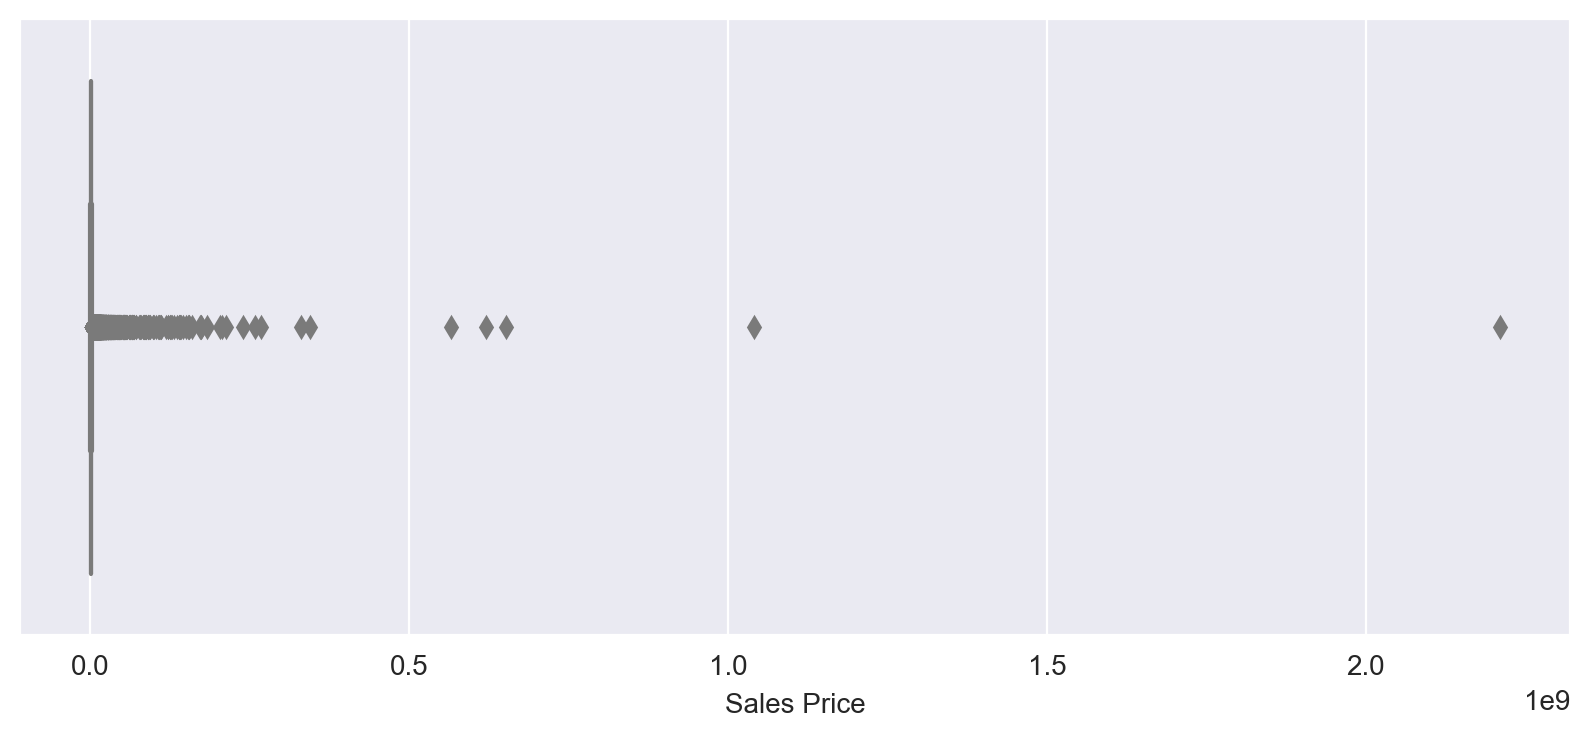

In [15]:
with sns.axes_style("darkgrid"):
    plt.figure(figsize=(10,4),dpi=200)
    sns.boxplot(data=df,x="sale_price",color=sns.color_palette("Pastel1")[1])
    plt.xlabel("Sales Price")
    plt.show()

Implement IQR (Interquartile Range) method to detect and remove outliers.
- Calculate the first and third quartile (Q1 and Q3)
- Evaluate the interquartile range where IQR = Q3 - Q1
- Estimate the lower limit where the lower limit = Q1 - (1.5 × IQR)
- Estimate the upper limit where the upper limit = Q3 + (1.5 × IQR)
- Select rows where the *sale_price* is between the lower and upper limits

In [16]:
sale_price_q1 = df["sale_price"].describe().loc["25%"]
sale_price_q3 = df["sale_price"].describe().loc["75%"]
sale_price_iqr = sale_price_q3 - sale_price_q1

sale_price_lower_limit = sale_price_q1 - (1.5 * sale_price_iqr)
sale_price_upper_limit = sale_price_q3 + (1.5 * sale_price_iqr)

df_without_outliers = df[(df["sale_price"] >= sale_price_lower_limit) & (df["sale_price"] <= sale_price_upper_limit)]
df_without_outliers.head()

,borough,neighborhood,building_class_category,tax_class_at_present,block,lot,building_class_at_present,address,zip_code,residential_units,commercial_units,total_units,land_square_feet,gross_square_feet,year_built,tax_class_at_time_of_sale,building_class_at_time_of_sale,sale_price,sale_date
12,Manhattan,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,373,40,C6,"327 EAST 3 STREET, 1C",10009,0,0,0,0.0,0.0,1920,2,C6,1.0,2016-09-06
13,Manhattan,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,373,40,C6,"327 EAST 3 STREET, 1C",10009,0,0,0,0.0,0.0,1920,2,C6,499000.0,2017-03-10
14,Manhattan,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,373,40,C6,"327 EAST 3 STREET, 3A",10009,0,0,0,0.0,0.0,1920,2,C6,10.0,2017-04-28
15,Manhattan,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,373,40,C6,"327 EAST 3RD STREET, 5A",10009,0,0,0,0.0,0.0,1920,2,C6,529500.0,2017-06-09
16,Manhattan,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,373,40,C6,"327 EAST 3 STREET, 2E",10009,0,0,0,0.0,0.0,1920,2,C6,423000.0,2017-07-14


Let's recheck if the dataset still has any outliers. Apparently, there are still some outliers.

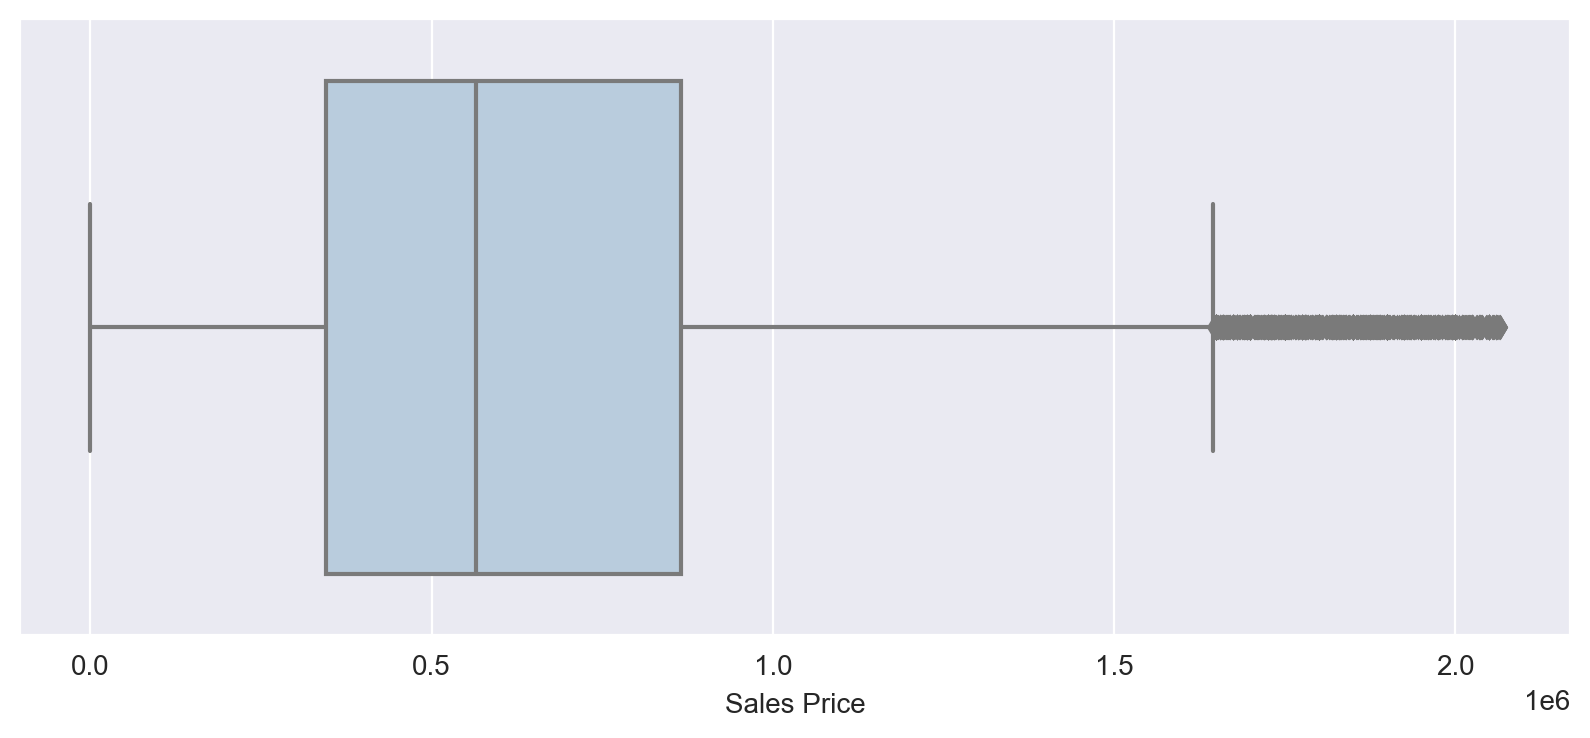

In [17]:
with sns.axes_style("darkgrid"):
    plt.figure(figsize=(10,4),dpi=200)
    sns.boxplot(data=df_without_outliers,x="sale_price",color=sns.color_palette("Pastel1")[1])
    plt.xlabel("Sales Price")
    plt.show()

Repeat the step earlier twice with *for loop* to remove any leftover outliers.

In [18]:
n = 1
limit = 2

while n <= limit:
    sale_price_q1 = df_without_outliers["sale_price"].describe().loc["25%"]
    sale_price_q3 = df_without_outliers["sale_price"].describe().loc["75%"]
    sale_price_iqr = sale_price_q3 - sale_price_q1

    sale_price_lower_limit = sale_price_q1 - (1.5 * sale_price_iqr)
    sale_price_upper_limit = sale_price_q3 + (1.5 * sale_price_iqr)

    df_without_outliers = df_without_outliers[(df_without_outliers["sale_price"] >= sale_price_lower_limit) & 
                                              (df_without_outliers["sale_price"] <= sale_price_upper_limit)]
    
    n += 1
    
df_without_outliers.head()

,borough,neighborhood,building_class_category,tax_class_at_present,block,lot,building_class_at_present,address,zip_code,residential_units,commercial_units,total_units,land_square_feet,gross_square_feet,year_built,tax_class_at_time_of_sale,building_class_at_time_of_sale,sale_price,sale_date
12,Manhattan,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,373,40,C6,"327 EAST 3 STREET, 1C",10009,0,0,0,0.0,0.0,1920,2,C6,1.0,2016-09-06
13,Manhattan,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,373,40,C6,"327 EAST 3 STREET, 1C",10009,0,0,0,0.0,0.0,1920,2,C6,499000.0,2017-03-10
14,Manhattan,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,373,40,C6,"327 EAST 3 STREET, 3A",10009,0,0,0,0.0,0.0,1920,2,C6,10.0,2017-04-28
15,Manhattan,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,373,40,C6,"327 EAST 3RD STREET, 5A",10009,0,0,0,0.0,0.0,1920,2,C6,529500.0,2017-06-09
16,Manhattan,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,373,40,C6,"327 EAST 3 STREET, 2E",10009,0,0,0,0.0,0.0,1920,2,C6,423000.0,2017-07-14


Even though there's still a few outliers, but it's much better than it was, so we can proceed to the next step.

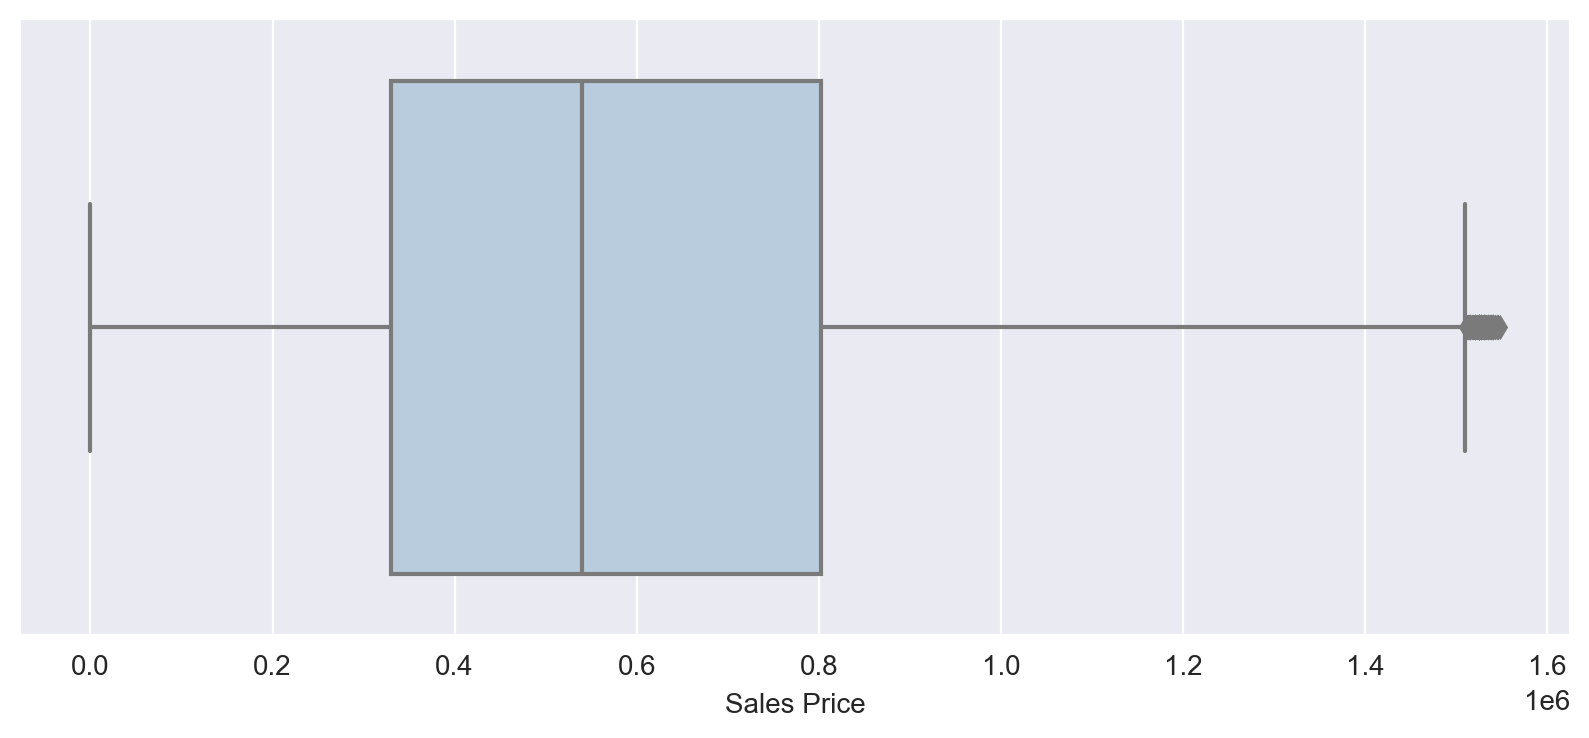

In [19]:
with sns.axes_style("darkgrid"):
    plt.figure(figsize=(10,4),dpi=200)
    sns.boxplot(data=df_without_outliers,x="sale_price",color=sns.color_palette("Pastel1")[1])
    plt.xlabel("Sales Price")
    plt.show()

# Measures of Central Tendency

Calculate measures of central tendency by every *borough* and *tax_class_at_present*, such as:
- Mean
- Median
- Mode
- Range
- Variance
- Standard Deviation

If there are NaN values, it means that there's only a single value within that *borough* and *tax_class_at_present*, so let's drop all of the NaN values.

In [20]:
from statistics import mode

measure = df_without_outliers.groupby(["borough","tax_class_at_present"]).agg({"sale_price":[np.mean,
                                                                                             np.median,
                                                                                             mode,
                                                                                             np.ptp,
                                                                                             np.var,
                                                                                             np.std]}).reset_index()
measure.columns = measure.columns.droplevel(-1)
measure.columns = ["borough","tax_class_at_present","mean","median","mode","range","variance","standard_deviation"]
measure = measure.dropna()
measure

,borough,tax_class_at_present,mean,median,mode,range,variance,standard_deviation
0,Bronx,1,4.500401e+05,450000.0,10.0,1449999.0,3.667393e+10,191504.398515
1,Bronx,1A,3.158523e+05,310000.0,230000.0,802281.0,2.226090e+10,149200.871084
2,Bronx,1B,3.361601e+05,290000.0,1000.0,1464999.0,1.180873e+11,343638.290800
3,Bronx,2,2.076381e+05,165000.0,110000.0,1399999.0,2.678174e+10,163651.286299
4,Bronx,2A,5.919874e+05,607500.0,650000.0,1529990.0,7.658155e+10,276733.717268
5,Bronx,2B,1.046879e+06,1100000.0,1100000.0,1524990.0,1.065708e+11,326451.846128
7,Bronx,4,5.922828e+05,562500.0,800000.0,1499999.0,1.789411e+11,423014.278720
8,Brooklyn,1,7.206687e+05,700000.0,10.0,1542999.0,1.413910e+11,376019.976719
9,Brooklyn,1A,5.522666e+05,529745.0,10.0,1509999.0,8.506974e+10,291667.179102
10,Brooklyn,1B,4.306487e+05,295100.5,150000.0,1449999.0,1.550468e+11,393759.777053


Visualize the mean of *sale_price* based on *borough* and *tax_class_at_present*.

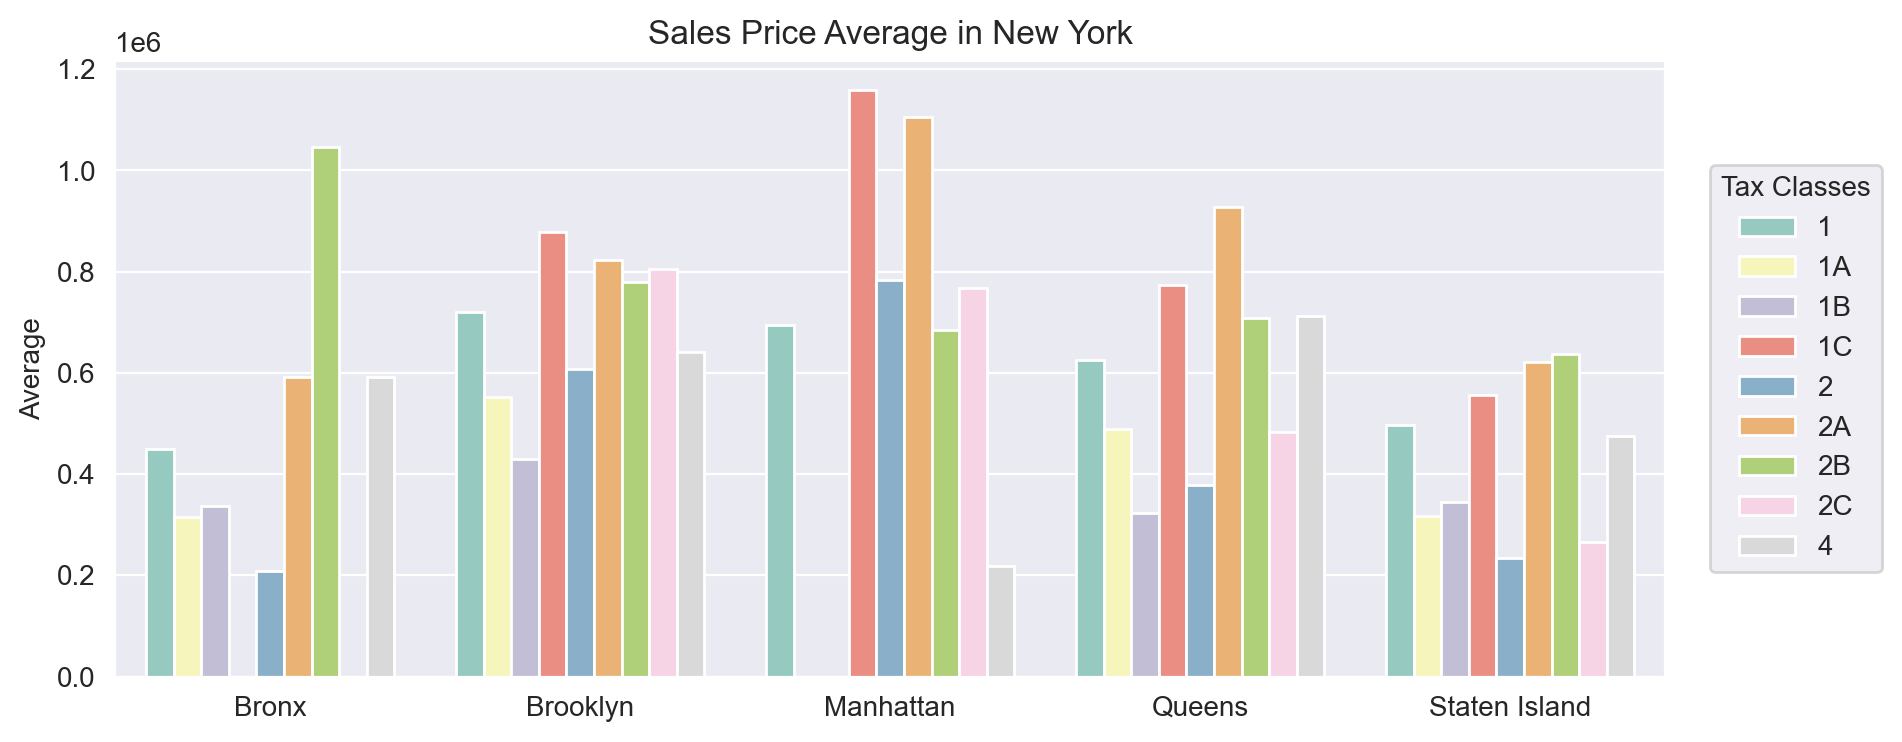

In [21]:
with sns.axes_style("darkgrid"):
    plt.figure(figsize=(10,4),dpi=200)
    sns.barplot(data=measure,x="borough",y="mean",hue="tax_class_at_present",palette="Set3",
                hue_order=np.sort(measure["tax_class_at_present"].unique()))
    plt.title("Sales Price Average in New York")
    plt.xlabel("")
    plt.ylabel("Average")
    plt.legend(bbox_to_anchor=(1.02,0.5),loc="center left",title="Tax Classes")
    plt.show()

# Confidence Interval of the Sample Mean

Based on the *measure* table above, it can be seen that Manhattan (1C), Manhattan (2A), and Bronx (2B) have the top 3 highest averages in *sale_price*. So, we'll slice the dataset based on those *borough* and *tax_class_at_present*.

In [22]:
top_3_means = measure.sort_values("mean",ascending=False).head(3)

temp = []
for i,j in zip(top_3_means["borough"],top_3_means["tax_class_at_present"]):
    temp.append(df_without_outliers[(df_without_outliers["borough"] == i) & 
                                    (df_without_outliers["tax_class_at_present"] == j)])
    
top_3_sale_price = np.array(pd.concat(temp)["sale_price"])
top_3_sale_price

array([9.000000e+05, 1.102500e+06, 1.475000e+06, 1.000000e+01,
       3.130000e+05, 1.320000e+06, 1.800000e+05, 8.425000e+05,
       1.431326e+06, 1.100000e+06, 1.525000e+06, 1.300000e+06,
       1.300000e+06, 1.469500e+06, 1.275000e+06, 1.487500e+06,
       1.525000e+06, 1.400000e+06, 4.063000e+03, 1.320000e+06,
       1.500000e+06, 1.515000e+06, 1.130000e+06, 1.280000e+06,
       1.315000e+06, 8.800000e+05, 9.500000e+05, 1.100000e+06,
       1.175000e+06, 8.750000e+05, 1.200000e+06, 1.250000e+06,
       1.250000e+06, 1.100000e+06, 1.175000e+06, 1.525000e+06,
       1.100000e+06, 1.050000e+06, 4.300000e+04, 1.350000e+06,
       1.020000e+06, 1.400000e+06, 1.260000e+06, 7.500000e+05,
       8.400000e+05, 1.000000e+06, 5.000000e+05, 1.425000e+06,
       1.200000e+06, 1.450000e+06, 1.232030e+06, 1.150000e+06,
       1.350000e+06, 1.265000e+06, 1.264000e+06, 1.150000e+06,
       1.100000e+06, 7.650000e+05, 1.380000e+06, 1.000000e+06,
       8.500000e+05, 9.400000e+05, 9.100000e+05, 1.0000

Take 25 random samples and calculate their means for 300 times, then assign them to *sample_mean*.

In [23]:
np.random.seed(9071)
sample_mean = []
n = 25

for i in range(300):
    temp_value = np.random.choice(a=top_3_sale_price,size=n)
    temp_mean = np.mean(temp_value)
    sample_mean.append(temp_mean)

Visualize the *sample_mean* and it can be seen that it's approximately normally distributed.

C:\Users\ASUS\AppData\Local\Temp\ipykernel_15800\2528910121.py:9: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for item in leg.legendHandles:


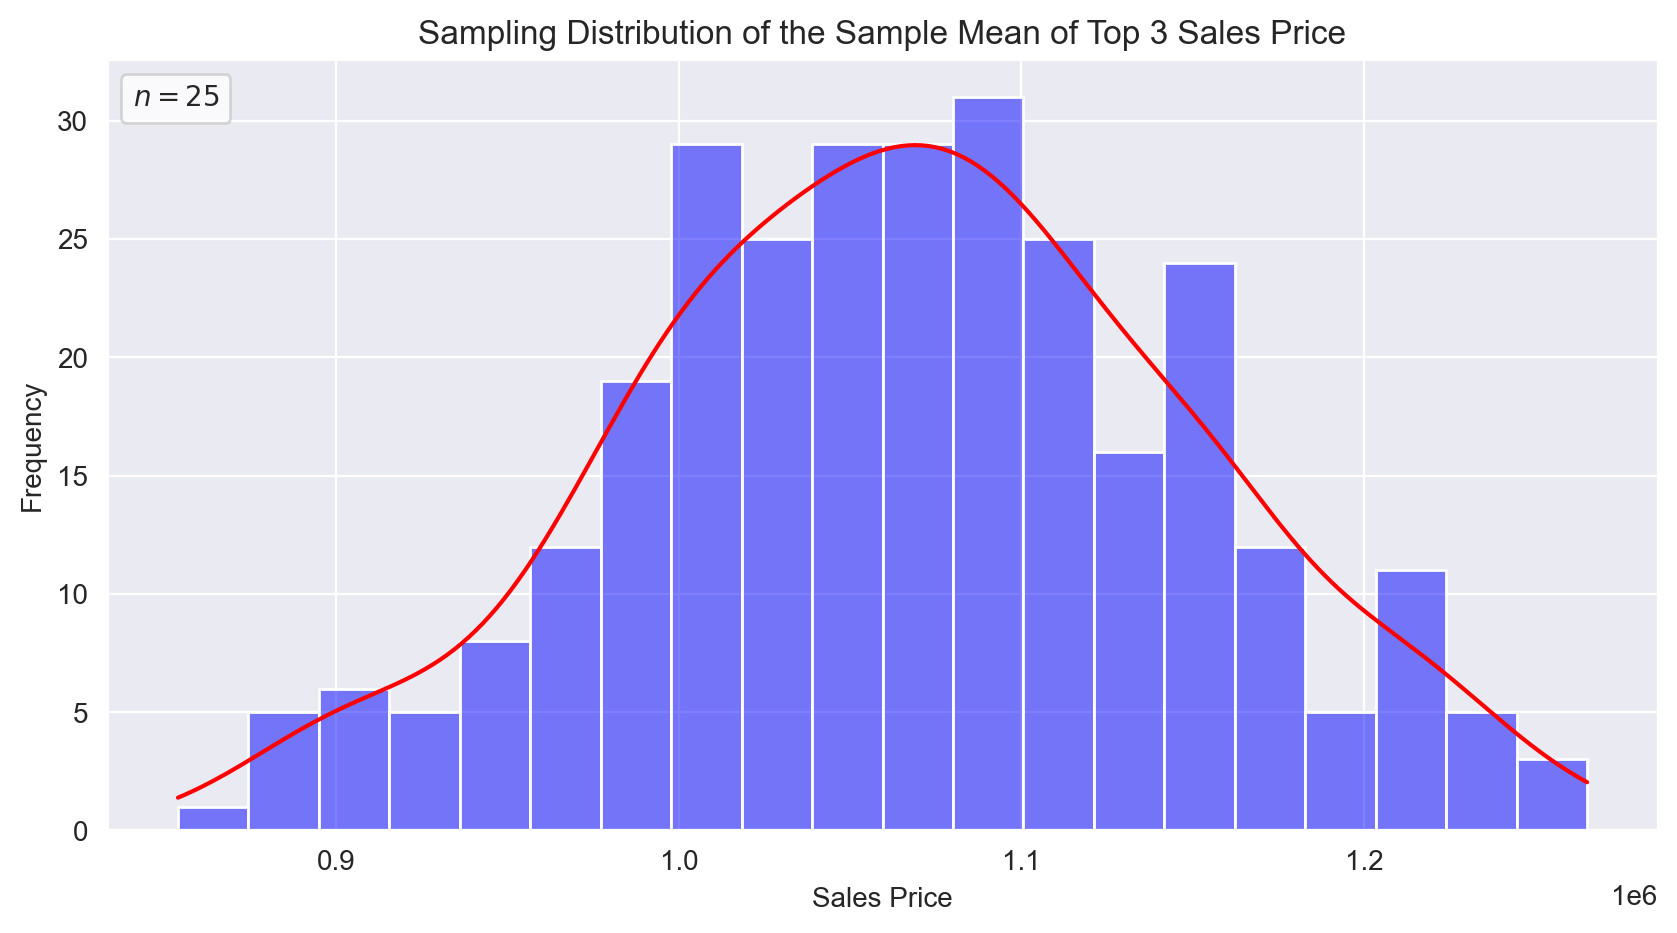

In [24]:
with sns.axes_style("darkgrid"):
    plt.figure(figsize=(10,5),dpi=200)
    ax = sns.histplot(data=sample_mean,bins=20,kde=True,color="blue",label=f"$n = {n}$")
    ax.lines[0].set_color("red")
    plt.title("Sampling Distribution of the Sample Mean of Top 3 Sales Price")
    plt.xlabel("Sales Price")
    plt.ylabel("Frequency")
    leg = plt.legend(handlelength=0,handletextpad=0,fancybox=True,loc="upper left",facecolor="white")
    for item in leg.legendHandles:
        item.set_visible(False)
    plt.show()

Calculate summary statistics to summarize and provide the gist of information about the *sample_mean*.

In [25]:
sample_mean_median = np.median(sample_mean)
sample_mean_mean = np.mean(sample_mean)
sample_mean_std = np.std(sample_mean)

for i,j in zip(["Median","Mean","Std."],[sample_mean_median,sample_mean_mean,sample_mean_std]):
    print(f"{i}\t= {j}")

Median	= 1066809.8399999999
Mean	= 1067638.3781333333
Std.	= 81053.15352336876


Calculate the standard error where $SE = \frac{\sigma}{\sqrt{n}}$.

In [26]:
std_error = np.std(top_3_sale_price) / np.sqrt(n)
std_error

77585.59538292691

Find the $z_{score}$ for $95\%$ confidence using *statistics.NormalDist*.

In [27]:
from statistics import NormalDist

confidence = 0.95
z = NormalDist().inv_cdf((1 + confidence) / 2)
z

1.9599639845400536

Calculate the confidence interval where $CI = \bar{x} \pm zSE$.

In [28]:
lower_95 = sample_mean_mean - (z * std_error)
upper_95 = sample_mean_mean + (z * std_error)

for i,j in zip(["Lower Limit","Upper Limit"],[lower_95,upper_95]):
    print(f"{i}\t= {j}")

Lower Limit	= 915573.4054636995
Upper Limit	= 1219703.350802967


Visualize the confidence interval of the *sample_mean*. Based on the plot, it's determined that there's a $95\%$ chance that the mean of a sample of $N = 25$ will be within the blue shaded area. Thus, the probability that the mean of a sample with $N = 25$ will be outside the blue shaded area is $100\% - 95\%$ or $5\%$.

C:\Users\ASUS\AppData\Local\Temp\ipykernel_15800\1552812613.py:35: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  [item.set_visible(False) for item in leg.legendHandles]


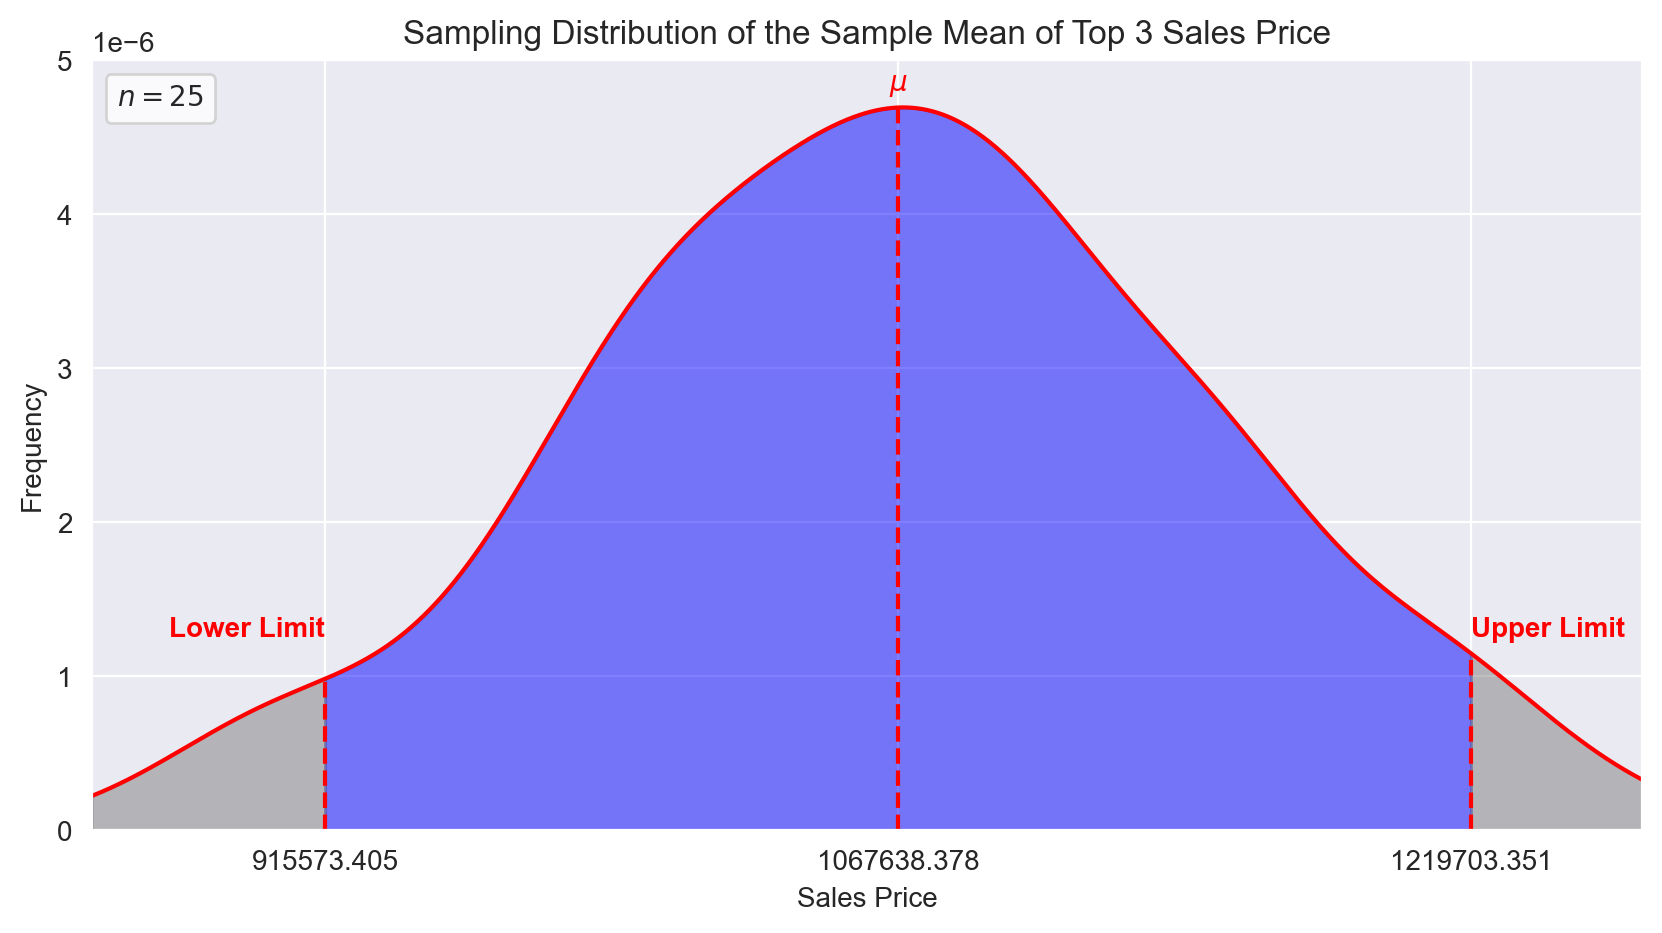

In [29]:
from scipy.stats import gaussian_kde

with sns.axes_style("darkgrid"):
    plt.figure(figsize=(10,5),dpi=200)

    kde = gaussian_kde(sample_mean)
    pos = np.linspace(np.min(sample_mean),np.max(sample_mean),10_000)
    plt.plot(pos,kde(pos),color="red",label=f"$n = {n}$")

    shade_95 = np.linspace(lower_95,upper_95,10_000)
    plt.fill_between(shade_95,kde(shade_95),color="blue",alpha=0.5)
    
    left = np.linspace(np.min(sample_mean),lower_95,10_000)
    right = np.linspace(upper_95,np.max(sample_mean),10_000)
    [plt.fill_between(i,kde(i),color="grey",alpha=0.5) for i in [left,right]]
    
    [plt.vlines(x=i,ymin=0,ymax=kde(i),color="red",linestyle="--") for i in [lower_95,sample_mean_mean,upper_95]]
        
    plt.annotate("Lower Limit",(lower_95,kde(upper_95)),color="red",weight="bold",
                 textcoords="offset points",xytext=(0,6),ha="right")
    plt.annotate("$\mu$",(sample_mean_mean,kde(sample_mean_mean)),color="red",weight="bold",
                 textcoords="offset points",xytext=(0,6),ha="center")
    plt.annotate("Upper Limit",(upper_95,kde(upper_95)),color="red",weight="bold",
                 textcoords="offset points",xytext=(0,6),ha="left")
    
    plt.title("Sampling Distribution of the Sample Mean of Top 3 Sales Price")
    plt.xlabel("Sales Price")
    plt.xticks([lower_95,sample_mean_mean,upper_95],
               [np.round(lower_95,3),np.round(sample_mean_mean,3),np.round(upper_95,3)])
    plt.xlim(np.min(sample_mean),np.max(sample_mean))
    plt.ylabel("Frequency")
    plt.ylim(0,5e-6)
    
    leg = plt.legend(handlelength=0,handletextpad=0,fancybox=True,loc="upper left",facecolor="white")
    [item.set_visible(False) for item in leg.legendHandles]
    
    plt.show()

# Probability Distribution & Hypothesis Testing
### Hypothesis
- $H_{0}$: *top_3_sale_price* data is normally distributed
- $H_{1}$: *top_3_sale_price* data is not normally distributed

### Significance Level
$\alpha = 5\%$
### Test Statistics

Check normality visually with histogram and it can be seen that the distribution has a moderate negative skewness, so it's likely not normally distributed.

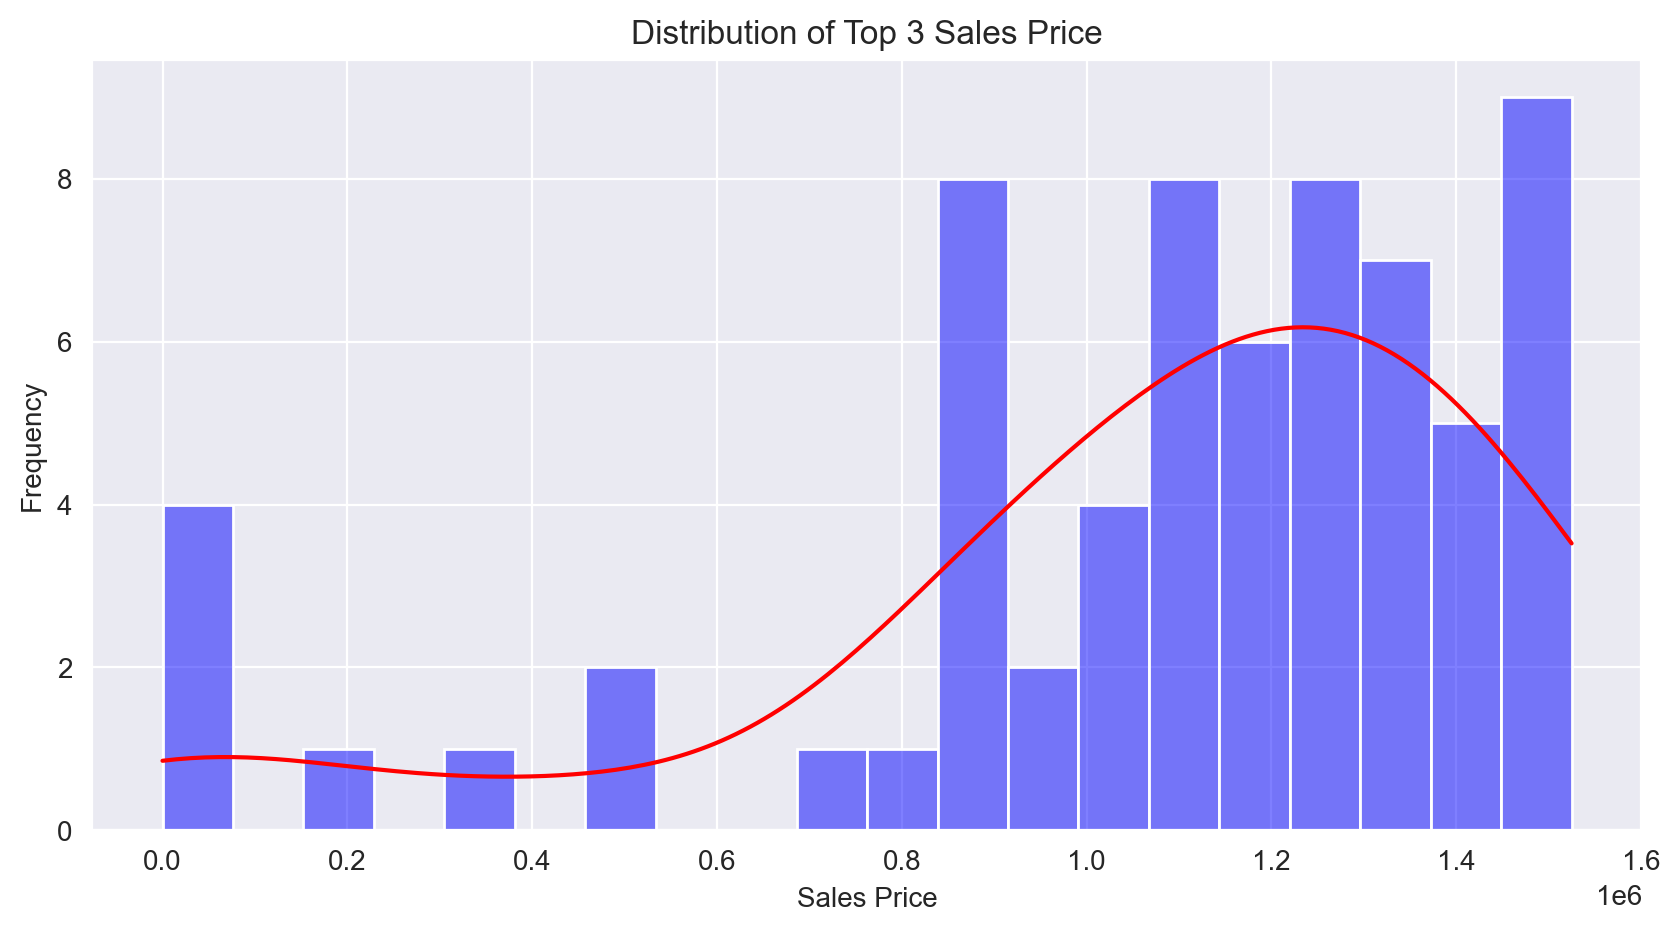

In [30]:
with sns.axes_style("darkgrid"):
    plt.figure(figsize=(10,5),dpi=200)
    ax = sns.histplot(data=top_3_sale_price,bins=20,kde=True,color="blue")
    ax.lines[0].set_color("red")
    plt.title("Distribution of Top 3 Sales Price")
    plt.xlabel("Sales Price")
    plt.ylabel("Frequency")
    plt.show()

To be more certain, we can check normality formally using Kolmorogov-Smirnov with Lilliefors significance correction and Shapiro-Wilk tests. It's known that both p-values of K-S and S-W, which are 0.000295 and 0.000002 respectively are less than 0.05, so *top_3_sale_price* isn't normally distributed.

In [31]:
from statsmodels.stats.diagnostic import lilliefors
from scipy.stats import shapiro

ks_stat,ks_pval = lilliefors(top_3_sale_price,dist="norm",pvalmethod="approx")
sw_stat,sw_pval = shapiro(top_3_sale_price)

normality = pd.DataFrame({"Statistics":[ks_stat,sw_stat],"P-Values":[ks_pval,sw_pval]},
                         index=["Kolmogorov-Smirnov","Shapiro-Wilk"])
normality

,Statistics,P-Values
Kolmogorov-Smirnov,0.157134,0.000295
Shapiro-Wilk,0.855060,0.000002


As an alternative, the data can be transformed using formulas as follows:

| Histograms | Formulas |
| :---: | :---: |
| Moderate Positive Skewness | $\sqrt{x}$ |
| Substantial Positive Skewness | $\log_{10}x$ |
| Severe Positive Skewness | $\frac{1}{x}$ |
| Moderate Negative Skewness | $\sqrt{k-x}$ |
| Substantial Negative Skewness | $\log_{10}(k-x)$ |
| Severe Negative Skewness | $\frac{1}{k-x}$ |
|<img width=150/>|<img width=150/>|

where $k$ is the largest value in the data. Based on the plot above, it can be seen that the distribution has a moderate negative skewness, so the formula that's going to be used for this transformation is $\sqrt{k-x}$.

In [32]:
sale_price_trans = np.sqrt(np.max(top_3_sale_price) - top_3_sale_price)
sale_price_trans

array([ 790.56941504,  650.        ,  223.60679775, 1234.90485463,
       1100.90871556,  452.76925691, 1159.74135047,  826.13558209,
        306.0620852 ,  651.92024052,    0.        ,  474.34164903,
        474.34164903,  235.58437979,  500.        ,  193.64916731,
          0.        ,  353.55339059, 1233.26274573,  452.76925691,
        158.11388301,  100.        ,  628.4902545 ,  494.97474683,
        458.2575695 ,  803.11892021,  758.28754441,  651.92024052,
        591.60797831,  806.22577483,  570.08771255,  524.40442409,
        524.40442409,  651.92024052,  591.60797831,    0.        ,
        651.92024052,  689.2024376 , 1217.37422348,  418.33001327,
        710.63352018,  353.55339059,  514.78150705,  880.34084308,
        827.64726786,  724.56883731, 1012.42283657,  316.22776602,
        570.08771255,  273.86127875,  541.26703206,  612.3724357 ,
        418.33001327,  509.90195136,  510.88159098,  612.3724357 ,
        651.92024052,  871.77978871,  380.78865529,  724.56883

After transformation, the distribution is approximately symmetric, so it seems it's normally distributed.

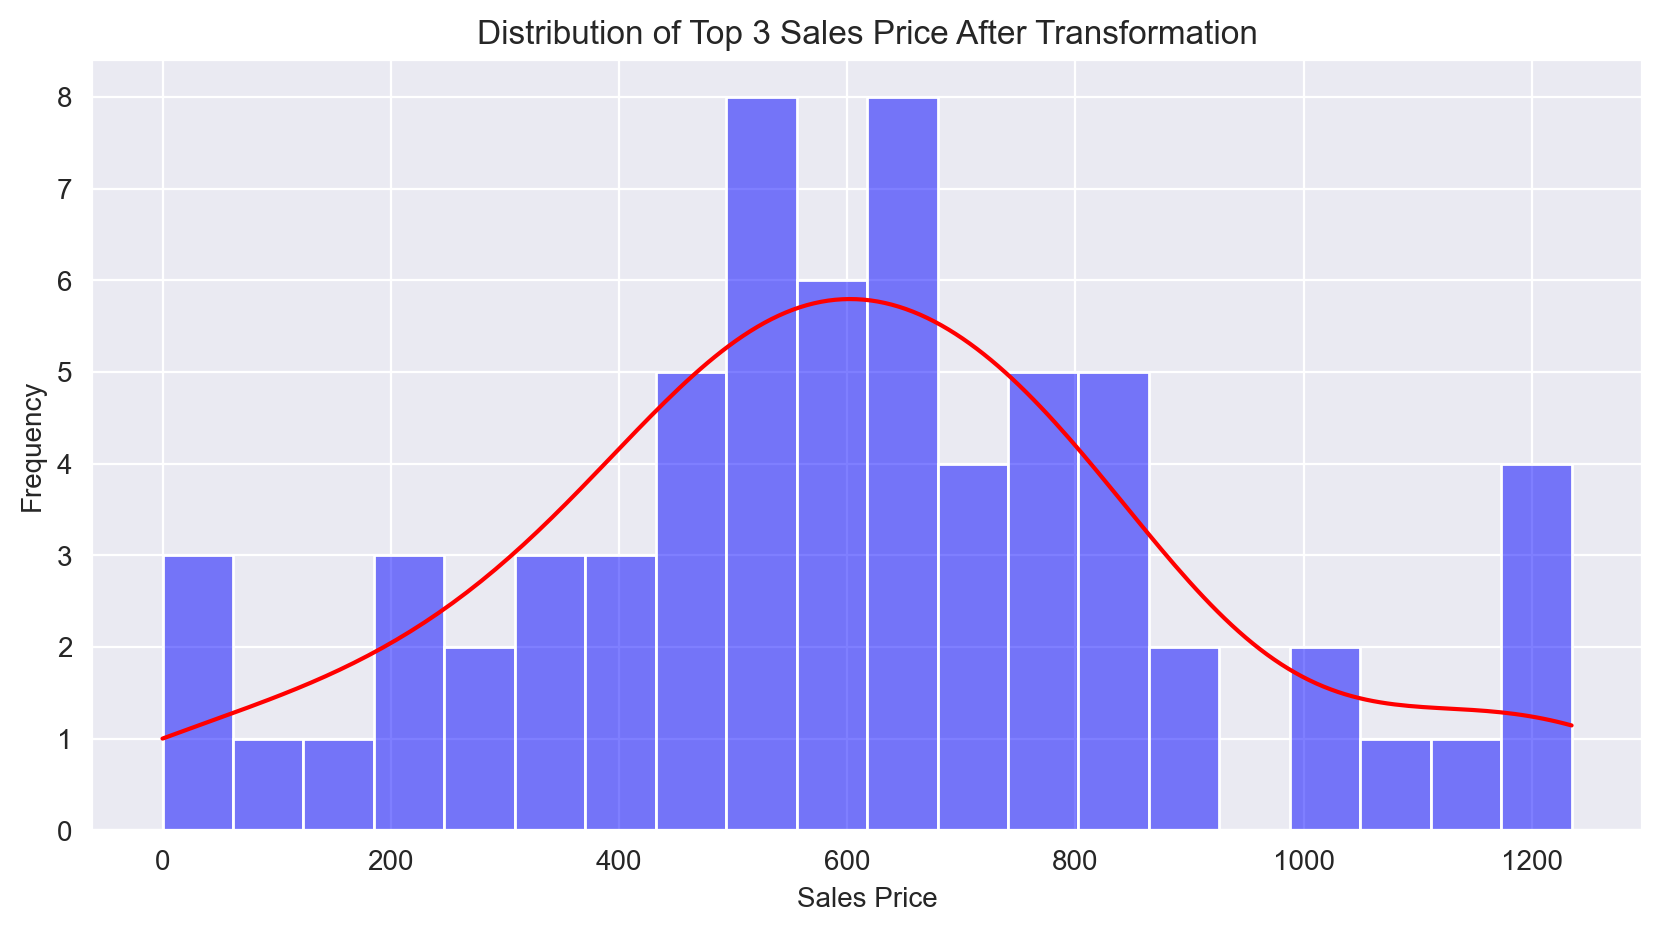

In [33]:
with sns.axes_style("darkgrid"):
    plt.figure(figsize=(10,5),dpi=200)
    ax = sns.histplot(data=sale_price_trans,bins=20,kde=True,color="blue")
    ax.lines[0].set_color("red")
    plt.title("Distribution of Top 3 Sales Price After Transformation")
    plt.xlabel("Sales Price")
    plt.ylabel("Frequency")
    plt.show()

It's also known that both p-values of K-S and S-W, which are 0.452523 and 0.188328 respectively are greater than 0.05, so *top_3_sale_price* is now normally distributed.

In [34]:
ks_stat,ks_pval = lilliefors(sale_price_trans,dist="norm",pvalmethod="approx")
sw_stat,sw_pval = shapiro(sale_price_trans)

normality_trans = pd.DataFrame({"Statistics":[ks_stat,sw_stat],"P-Values":[ks_pval,sw_pval]},
                         index=["Kolmogorov-Smirnov","Shapiro-Wilk"])
normality_trans

,Statistics,P-Values
Kolmogorov-Smirnov,0.078397,0.452523
Shapiro-Wilk,0.974697,0.188337


### Conclusion
At the $5\%$ significance level, $H_{0}$ was rejected due to both p-values of Kolmogorov-Smirnov and Shapiro-Wilk were less than 0.05. However, after the data was transformed, $H_{0}$ is now accepted due to both p-values are greater than 0.05. So, it can be concluded that *top_3_sale_price* data is normally distributed.